In [1]:
import pandas as pd
import numpy as np

# Machine Learning & Data Science Helper Library
import sklearn
from sklearn.model_selection import KFold, train_test_split

In [2]:
apt_data = pd.read_csv('apartments_final.csv')

In [3]:
apt_data.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Downtown Proximity,Borough Color,Venue_Accessories_Store,Venue_Adult_Boutique,...,Venue_Vegetarian_/_Vegan_Restaurant,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio
0,1,1.0,1,43.643051,-79.391643,2150.0,0.106921,1,0,0,...,5,0,0,0,0,5,0,0,0,10
1,1,1.0,0,43.640918,-79.393982,1900.0,0.134128,1,0,0,...,2,0,0,0,0,2,0,0,0,6
2,1,1.0,0,43.641308,-79.400093,1900.0,0.169330,1,0,0,...,2,0,0,0,0,0,0,0,0,6
3,1,1.0,1,43.640068,-79.399960,2400.0,0.175443,1,0,0,...,7,0,0,0,0,0,0,0,0,28
4,1,1.0,0,43.647627,-79.390408,2650.0,0.068714,1,0,0,...,15,5,0,0,0,0,0,0,0,10


In [4]:
# Features
X = apt_data.drop(['Lat', 'Long', 'Price'], axis='columns')

# Price will be our labels
y = apt_data[['Price']]

In [5]:
# Splot 80/20 for training, testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Lets try to identify some good models by trying many different Linear & Non-Linear Models
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic Net
- SGD
- Bayesian Regression
- Logistical Regression
- SVM (SVR)

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

In [9]:
linear_model = LinearRegression(fit_intercept=True)

# Train Linear Model
l_model = linear_model.fit(X_train, y_train)

# Predict on Test Data
predictions = l_model.predict(X_test)
predictions.shape

(153, 1)

Text(0, 0.5, 'Predicted Price')

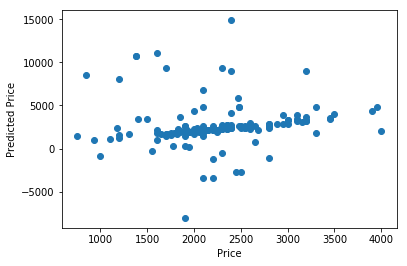

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
# plt.scatter(y_test, predictions)
ax.set_xlabel('Price')
ax.set_ylabel('Predicted Price')

In [11]:
score = l_model.score(X_test, y_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
print("Accuracy: ", score * 100, "%")
print("RMSE: $", np.sqrt(error))

Accuracy:  -1807.8744619754211 %
RMSE: $ 2648.383492120966


### Function to automate running models

In [6]:
def try_model(model, X_train, y_train, X_test, y_test):
    trained_model = model.fit(X=X_train, y=y_train)
    
    # Run on Test Data
    predictions = trained_model.predict(X_test)
    
    # Evaluate Performance
    score = trained_model.score(X_test, y_test)
    error = mean_squared_error(y_test, predictions)
    print("Accuracy: ", score * 100, "%")
    print("RMSE: $", np.sqrt(error))
    
    plt.scatter(y_test, predictions)
    plt.xlabel('Price')
    plt.ylabel('Predicted Price')

### Ridge Regression

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.62771e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.17973e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.39363e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy:  49.99954791852173 %
RMSE: $ 428.73895030785934


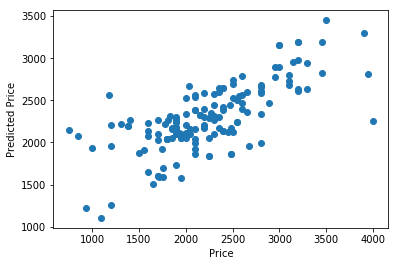

In [13]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas=[1e-10, 1e-5, 1e-2, 0, 1, 10, 100], cv=3, fit_intercept=True, normalize=False)
try_model(ridge_reg, X_train, y_train, X_test, y_test)

### Lasso Regression

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not conver

Accuracy:  49.85287749930008 %
RMSE: $ 429.36731736532283


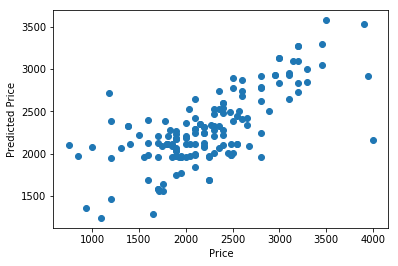

In [14]:
from sklearn.linear_model import LassoCV
lassoreg = LassoCV(alphas=[1, 10, 100], cv=3, tol=0.01)
try_model(lassoreg, X_train, y_train.values.ravel(), X_test, y_test)

## Elastic Net

Accuracy:  49.39036571043335 %
RMSE: $ 431.34282102182465


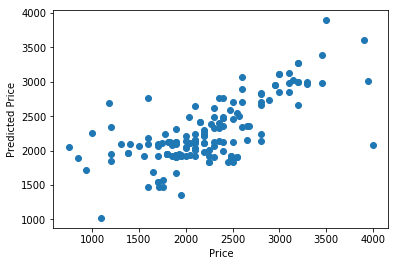

In [15]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.05, max_iter=1000, tol=1 ,l1_ratio=0.6)
try_model(enet, X_train, y_train.values.ravel(), X_test, y_test)

### SGD

Accuracy:  39.00547059368655 %
RMSE: $ 473.5342728297436


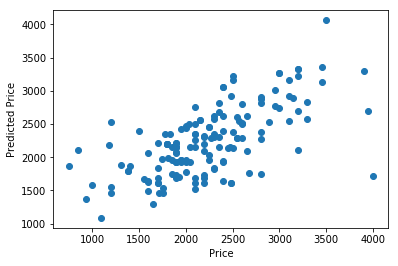

In [16]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(eta0=1e-5, tol=1e-5, max_iter=1000, learning_rate='adaptive')
try_model(sgd, X_train, y_train.values.ravel(), X_test, y_test)

### Bayesian Regression

Accuracy:  53.03212926410883 %
RMSE: $ 415.5338528950643


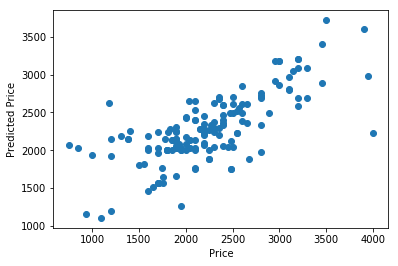

In [17]:
from sklearn.linear_model import BayesianRidge
brr = BayesianRidge(compute_score=True)
try_model(brr, X_train, y_train.values.ravel(), X_test, y_test)

### Logistical Regression

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  34.64052287581699 %
RMSE: $ 638.3571438757891


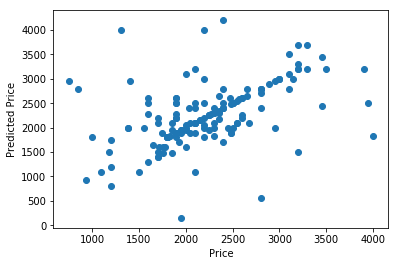

In [18]:
from sklearn.linear_model import LogisticRegression
# solver = newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga
# penalty = ‘l1’, ‘l2’
lrr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=100, tol=1e-6)
try_model(lrr, X_train, y_train.values.ravel(), X_test, y_test)

### SVM (SVR)

Accuracy:  17.78257204122794 %
RMSE: $ 549.7787101263522


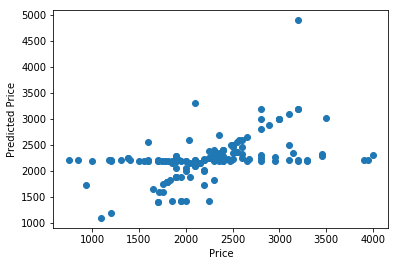

In [19]:
from sklearn.svm import SVR
# Kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid
svr = SVR(kernel='poly', degree=4, gamma='auto')
try_model(svr, X_train, y_train.values.ravel(), X_test, y_test)

Accuracy:  49.46202402411222 %
RMSE: $ 431.03734313705024


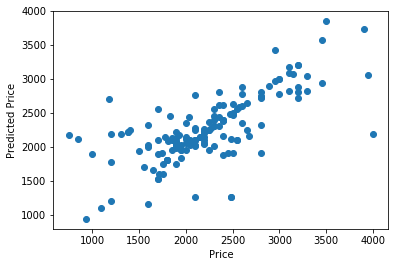

In [20]:
svr = SVR(kernel='linear', C=25)
try_model(svr, X_train, y_train.values.ravel(), X_test, y_test)

## GBDT

Accuracy:  45.33983796550817 %
RMSE: $ 448.27181359901897


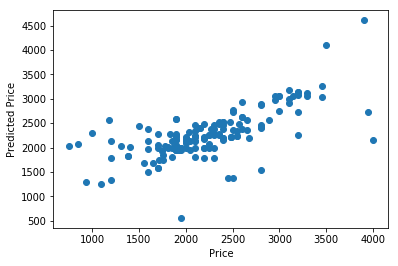

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.1)
try_model(gbr, X_train, y_train.values.ravel(), X_test, y_test)

## Random Forest

Accuracy:  57.09312180210444 %
RMSE: $ 397.16359535297875


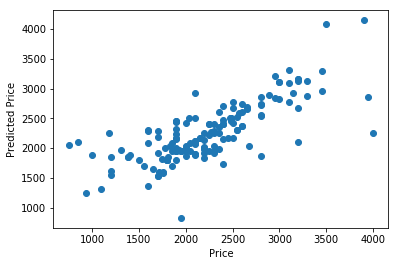

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=10)
try_model(rfr, X_train, y_train.values.ravel(), X_test, y_test)

# Model Performance

In [7]:
models = [{'Model': 'SVM (Linear)', 'Score %':54.228 , 'RMSE ($CAD)':453 },
{'Model':'Elastic Net' , 'Score %':54.400 , 'RMSE ($CAD)':452 },
{'Model':'Lasso Regression' , 'Score %':53.683 , 'RMSE ($CAD)':456 },
{'Model':'Bayesian Regression' , 'Score %':53.64 , 'RMSE ($CAD)':456 },
{'Model':'Ridge Regression' , 'Score %':47.843 , 'RMSE ($CAD)':484 },
{'Model':'Logistical Regression' , 'Score %':40.522 , 'RMSE ($CAD)':581 },
{'Model':'SGD' , 'Score %':29.368 , 'RMSE ($CAD)':550 },
{'Model':'SVM (Poly)' , 'Score %':17.55 , 'RMSE ($CAD)':609 },
{'Model':'Random Forest' , 'Score %':57.093 , 'RMSE ($CAD)':397 },
{'Model':'GBDT' , 'Score %':45.339 , 'RMSE ($CAD)':448 }]

model_perf = pd.DataFrame.from_dict(models)
model_perf

,Model,RMSE ($CAD),Score %
0,SVM (Linear),453,54.228
1,Elastic Net,452,54.400
2,Lasso Regression,456,53.683
3,Bayesian Regression,456,53.640
4,Ridge Regression,484,47.843
5,Logistical Regression,581,40.522
6,SGD,550,29.368
7,SVM (Poly),609,17.550
8,Random Forest,397,57.093
9,GBDT,448,45.339


Text(0, 0.5, 'Model Type\n')

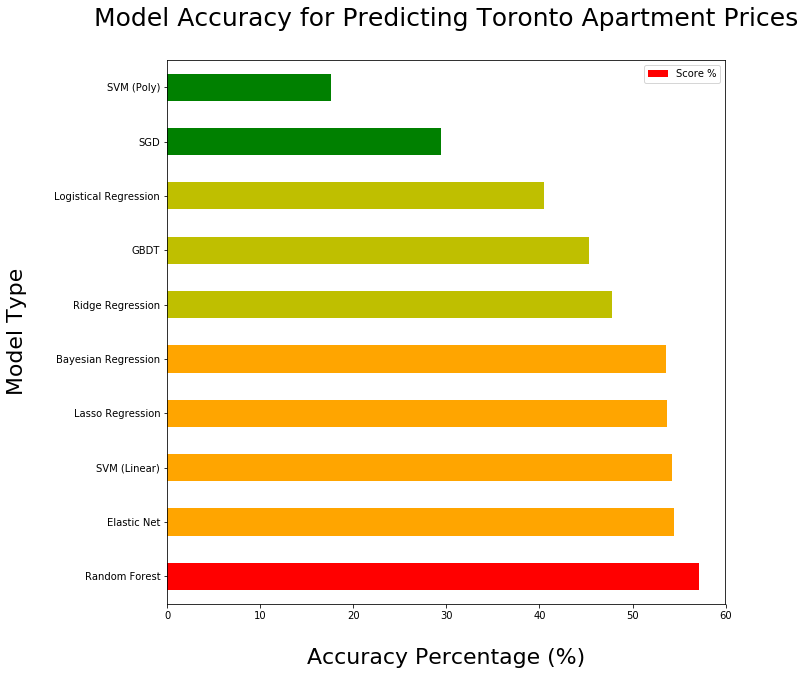

In [78]:
colors=['r' ,'orange','orange' ,'orange','orange' ,'y','y' ,'y','g' ,'g']

# Highest Accuracy is Random Forest
ax = model_perf.sort_values(by='Score %', ascending=False).plot('Model', 'Score %', kind='barh', figsize=(10,10), color=colors)
ax.set_title("Model Accuracy for Predicting Toronto Apartment Prices\n", fontsize=25)
ax.set_xlabel("\nAccuracy Percentage (%)", fontsize=22)
ax.set_ylabel("Model Type\n", fontsize=22)

### The highest scoring regressor is the Random Forest Regressor.

Text(0, 0.5, 'Model Type\n')

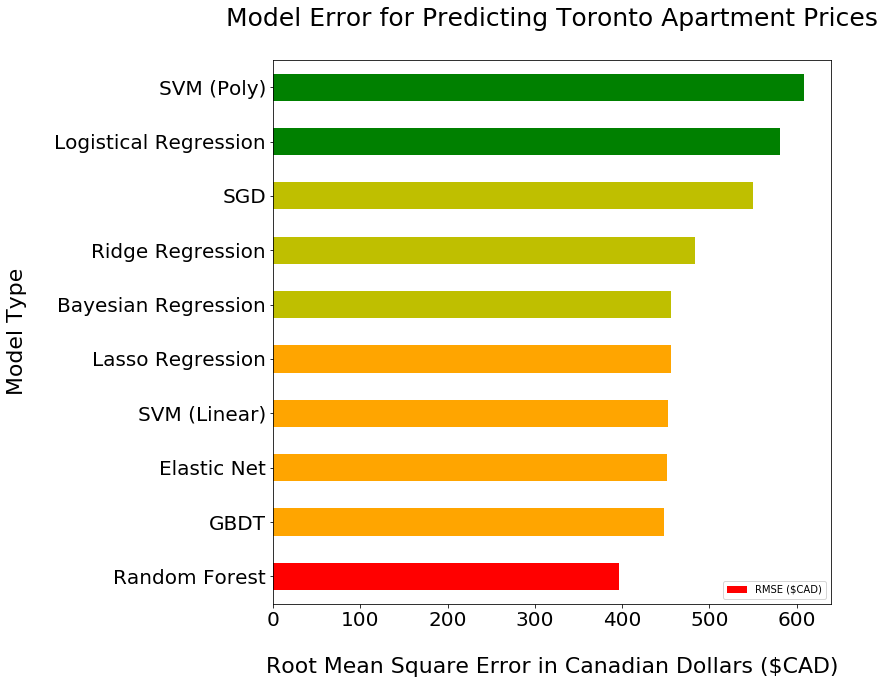

In [79]:
# Lowest Error is Random Forest
ax = model_perf.sort_values(by='RMSE ($CAD)').plot('Model', 'RMSE ($CAD)', kind='barh', figsize=(10, 10), color=colors, fontsize=20)
ax.set_title("Model Error for Predicting Toronto Apartment Prices\n", fontsize=25)
ax.set_xlabel("\nRoot Mean Square Error in Canadian Dollars ($CAD)", fontsize=22)
ax.set_ylabel("Model Type\n", fontsize=22)

### Looking at their Root Mean Square Error: again the Random Forest Regressor performs the best with the lowest error.

## Tuning our Random Forest Regressor to the best it can be

In [49]:
from sklearn.model_selection import cross_val_predict, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,20),
        'n_estimators': (10, 50, 100, 1000),
    },
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [60]:
grid_result = gsc.fit(X, y.values.ravel())
best_params = grid_result.best_params_

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

In [62]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y.values.ravel(), cv=10, scoring='neg_mean_absolute_error')

In [63]:
grid_result.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [64]:
scores

array([-242.10327806, -357.36463507, -383.06357257, -379.09117938,
       -415.90155216, -327.15098289, -315.06252389, -371.58070332,
       -512.33010231, -459.73562168])

In [ ]:
scores.mean()

In [66]:
predict = cross_val_predict(rfr, X, y.values.ravel(), cv=10)

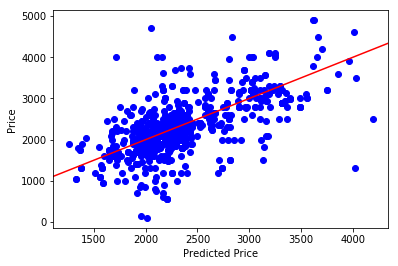

In [93]:
fig, ax = plt.subplots()
ax.scatter(predict, y, color='b')
ax.set_xlabel('Predicted Price')
ax.set_ylabel('Price')
ax.yaxis.set_ticks([0, 1000, 2000, 3000, 4000, 5000])

l = mlines.Line2D([y.min(),y.max()], [y.min(),y.max()], color='r', label='Perfect Prediction')
ax.add_line(l)

In [123]:
parameters = [{ 
    'max_depth': [13],
    'n_estimators': [145, 150, 155],
    'random_state': [42]
    }]
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    iid=False, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [124]:
grid_result = gsc.fit(X, y.values.ravel())
best_params = grid_result.best_params_

In [ ]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

In [125]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y.values.ravel(), cv=10, scoring='neg_mean_absolute_error')

In [126]:
scores

array([-242.10327806, -357.36463507, -383.06357257, -379.09117938,
       -415.90155216, -327.15098289, -315.06252389, -371.58070332,
       -512.33010231, -459.73562168])

In [127]:
best_params

{'max_depth': 13, 'n_estimators': 150, 'random_state': 42}

In [128]:
scores.mean()

-376.3384151329758

In [129]:
predict = cross_val_predict(rfr, X, y.values.ravel(), cv=10)

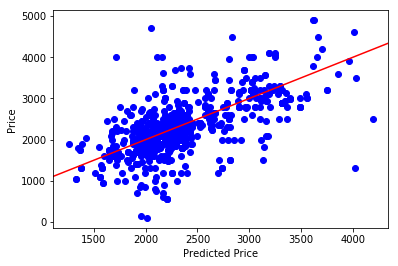

In [130]:
fig, ax = plt.subplots()
ax.scatter(predict, y, color='b')
ax.set_xlabel('Predicted Price')
ax.set_ylabel('Price')
ax.yaxis.set_ticks([0, 1000, 2000, 3000, 4000, 5000])

l = mlines.Line2D([y.min(),y.max()], [y.min(),y.max()], color='r', label='Perfect Prediction')
ax.add_line(l)

### 376: n_estimators=150

## Random Search for Parameters

In [136]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [150]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [13, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150], 'max_features': ['auto', 'sqrt'], 'max_depth': [13, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [138]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y.values.ravel())

C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   47.9s finished
C:\Users\BAILEYDuncan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [150], 'max_features': ['auto', 'sqrt'], 'max_depth': [13, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 13,
 'bootstrap': True}

In [154]:
def evaluate(model, test_features, test_labels):
    test_labels = test_labels.values.ravel()
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: ${:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 150, max_depth=13, random_state = 42)
base_model.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: $264.6852.
Accuracy = 85.41%.


In [155]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: $157.3812.
Accuracy = 91.33%.


## Now Use Hyperparameter Search on the Best Params

In [157]:
parameters = [{
     'n_estimators': [150],
     'min_samples_split': [9, 10, 11],
     'min_samples_leaf': [1, 2, 3],
     'max_features': ['auto'],
     'max_depth': [13],
     'bootstrap': [True]}]
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    iid=False, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [158]:
grid_result = gsc.fit(X, y.values.ravel())
best_params = grid_result.best_params_

In [174]:
rfr = RandomForestRegressor(bootstrap=best_params['bootstrap'],
 max_depth=best_params['max_depth'],
 max_features=best_params['max_features'],
 min_samples_leaf=best_params['min_samples_leaf'],
 min_samples_split=best_params['min_samples_split'],
 n_estimators=best_params['n_estimators'], verbose=False)

In [176]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y.values.ravel(), cv=10, scoring='neg_mean_absolute_error')
print(scores)
scores.mean()

[-248.7239892  -368.43703018 -382.699111   -396.67753906 -425.35250636
 -303.20939091 -329.50340695 -367.99079493 -514.11081037 -451.22585506]


-378.79304340103937

In [177]:
best_params

{'bootstrap': True,
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 150}

## Plot Performance with Cross Validation

In [180]:
predict = cross_val_predict(rfr, X, y.values.ravel(), cv=10)

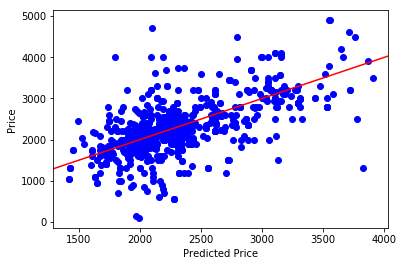

In [181]:
fig, ax = plt.subplots()
ax.scatter(predict, y, color='b')
ax.set_xlabel('Predicted Price')
ax.set_ylabel('Price')
ax.yaxis.set_ticks([0, 1000, 2000, 3000, 4000, 5000])

l = mlines.Line2D([y.min(),y.max()], [y.min(),y.max()], color='r', label='Perfect Prediction')
ax.add_line(l)